# Diffusion Equation with Degradation and Production Terms

Here, the basic diffusion equation describing the dynamics of the diffusing particles with concentration $ c(x, t) $ is extended to include constant particle production and degradation terms, which are assumed Biology Physics. Then the diffusion equation is given by:

$$ \partial_t c(x, t) = D \partial_x^2 c(x, t) - \beta c(x, t) + \alpha \chi_{w}(x) $$

where:
- $ D $ is the diffusion coefficient,
- $ \beta $ is the degradation rate,
- $ \alpha $ is the constant production rate, in the particles production region.
- $ \chi_w(x) $ the characteristic shape function  of the particles production region. 
Here, let's assume that particles can be produced in the region centered at $ x = 0 $ with width $ w $

$$ 
    \chi_w(x) = 
        \begin{cases}
            1/w, &\quad x \in [x_0, w] \\
            0, &\quad  x \not\in [x_0, w]
        \end{cases} 
$$

In [1]:
import numpy as np
import matplotlib.patches as patches
from tqdm import tqdm # library to visualize the progress status of a python loop
from euler_scheme_1d_with_growth.diffusion_equation import *
from euler_scheme_1d_with_growth.matplotlib_defaults import *

In [2]:
D     = 1.0  # Diffusion coefficient
beta  = 1.0  # Degradation rate
alpha = 1.0  # Production rate

w     = 0.4  # width of production region
x0    = 0.4  # starting position width of production region

L0   = 1.8
Lmax = 2 * L0    # system size boundaries are at the positions 0 and +Lmax

## Point source in the finite domain

In [3]:
def steady_solution_point(x, x0, lam, alpha, w, beta, D, L):

    # left  from the source
    part1 = np.cosh( (L - x0)/lam ) * np.cosh( x / lam )
    part1 = part1 * (x <= x0)

    # right from the source
    part3 = np.cosh( x0/lam ) * np.cosh( (L - x) / lam )
    part3 = part3 * (x > x0)

    result = (alpha * w /( (D*beta)**0.5 * np.sinh(L / lam))) * (part1 + part3) * (x0 + w <= L)
    
    return result

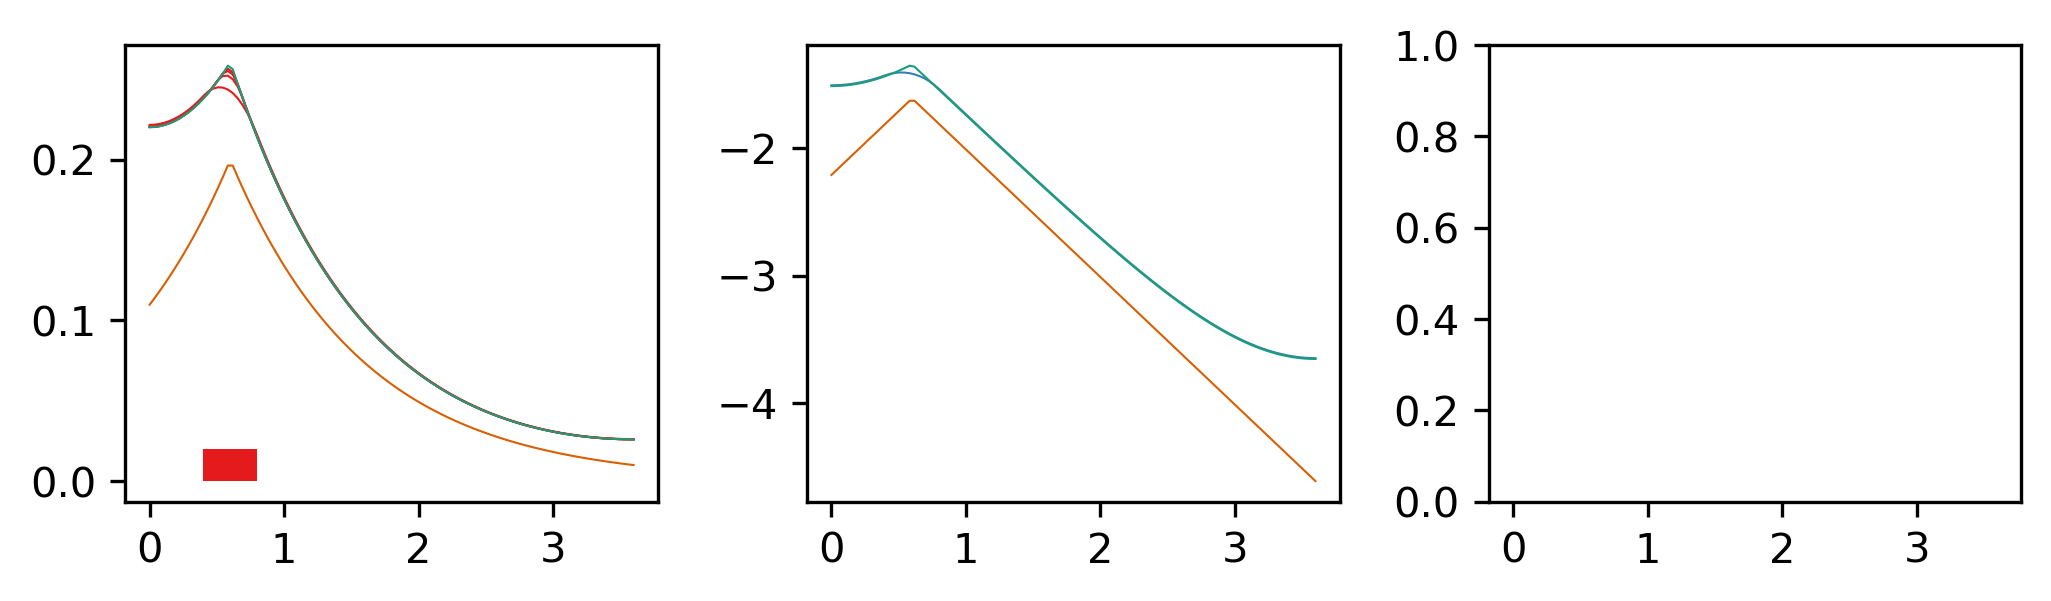

In [4]:
nrows, ncols = 1, 3
colors = plt.cm.Set1.colors

fig, ax = plt.subplots(nrows, ncols, figsize=(default_figsize["large"][0], default_figsize["large"][1]/4), sharex=True, sharey=False, dpi=300)

x = np.linspace(0, Lmax, 100)

i = 0
ax[i].add_patch( patches.Rectangle((x0, 0), w, 0.02, edgecolor=None, facecolor=colors[i]) )
for n in range(1, 5):
    ax[i].plot( 
        x, 
        n * steady_solution(x, x0 + (w - w/n)/2, (D/beta)**0.5, alpha, w/n, beta, D, Lmax), 
        label='Steady state', color=colors[i]
    )

ax[i].plot(x, steady_solution_point(x, x0+w/2, (D/beta)**0.5, alpha, w, beta, D, Lmax) )
ax[i].plot(x, alpha*w*np.exp( -np.abs(x-(x0+w/2)) / (D/beta)**0.5 )/np.sqrt(D*beta)/2 )

i = 1
#ax[i].add_patch( patches.Rectangle((x0, 0), w, 0.02, edgecolor=None, facecolor=colors[i]) )
ax[i].plot( 
        x, 
        np.log( steady_solution(x, x0, (D/beta)**0.5, alpha, w, beta, D, Lmax) ), 
        label='Steady state', color=colors[i]
    )

ax[i].plot(
    x, 
    np.log( steady_solution_point(x, x0+w/2, (D/beta)**0.5, alpha, w, beta, D, Lmax) )
)
ax[i].plot(
    x, 
    np.log( alpha*w*np.exp( -np.abs(x-(x0+w/2)) / (D/beta)**0.5 )/np.sqrt(D*beta)/2 )
)

plt.tight_layout()
plt.savefig('fig/pdd_limit_case.pdf')
plt.show()